This notebook presents the results of our experiments on the VAST dataset. In order to run it, you can either use the JSON result file provided in the repository (`results/vast.json`) or reproduce the experiments (see `README.md`).

In [1]:
import json

import graphviz
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
file_path = '../results/vast.json'
dat = json.loads(open(file_path).read())
print(dat.keys())

dict_keys(['top', 'bottom', 'thetas', 'counts'])


The JSON file containing the results has four main keys: `top` (resp. `bottom`) contains a list of dictionaries representing the top (resp. bottom) clusters, `thetas` contains the rate matrices $\mathbf{\Theta}_{hk}^{(\ell)}$ corresponding to the different edge types, and `counts` contains the total event counts for each (top cluster, bottom cluster, edge type) triple.

Let's take a look at the top clusters &mdash; i.e., clusters of internal hosts. Each dictionary inside `dat['top']` represents one cluster: its keys are the IP addresses of the hosts, and for each host, its value is the probability of that host to belong to its cluster (recall that our method first computes soft cluster assignments, then assigns each node to the most likely cluster).

In [3]:
def print_cluster(clust):
    nodes = sorted(list(clust.keys()), key=lambda x: -clust[x])
    for n in nodes:
        print(n, '\t', clust[n])

In [4]:
print_cluster(dat['top'][0])

172.10.2.106 	 1.0
172.10.2.135 	 1.0
172.10.2.66 	 1.0
172.20.1.23 	 1.0
172.20.1.47 	 1.0
172.20.1.81 	 1.0
172.30.1.218 	 1.0
172.30.1.223 	 1.0
172.10.1.11 	 0.9927189350128174
172.10.1.25 	 0.9927189350128174
172.10.1.53 	 0.9927189350128174
172.10.1.6 	 0.9927189350128174
172.10.1.69 	 0.9927189350128174
172.10.1.75 	 0.9927189350128174
172.10.1.79 	 0.9927189350128174
172.10.1.13 	 0.9917538166046143
172.10.1.16 	 0.9917538166046143
172.10.1.19 	 0.9917538166046143
172.10.1.2 	 0.9917538166046143
172.10.1.20 	 0.9917538166046143
172.10.1.26 	 0.9917538166046143
172.10.1.32 	 0.9917538166046143
172.10.1.33 	 0.9917538166046143
172.10.1.35 	 0.9917538166046143
172.10.1.38 	 0.9917538166046143
172.10.1.39 	 0.9917538166046143
172.10.1.40 	 0.9917538166046143
172.10.1.50 	 0.9917538166046143
172.10.1.52 	 0.9917538166046143
172.10.1.59 	 0.9917538166046143
172.10.1.67 	 0.9917538166046143
172.10.1.74 	 0.9917538166046143
172.10.1.77 	 0.9917538166046143
172.10.1.78 	 0.9917538166046

The first top cluster contains hosts from three distinct IP ranges: 172.10.1.1-172.10.2.147, 172.20.1.1-172.20.2.147, and 172.30.1.1-172.30.2.147. These correspond to the workstations from the three monitored sites. Note that the range 172.10.1.101-172.10.1.200 falls into the third cluster:

In [5]:
print_cluster(dat['top'][2])

172.10.1.101 	 1.0
172.10.1.102 	 1.0
172.10.1.103 	 1.0
172.10.1.104 	 1.0
172.10.1.105 	 1.0
172.10.1.106 	 1.0
172.10.1.107 	 1.0
172.10.1.108 	 1.0
172.10.1.109 	 1.0
172.10.1.110 	 1.0
172.10.1.111 	 1.0
172.10.1.112 	 1.0
172.10.1.113 	 1.0
172.10.1.114 	 1.0
172.10.1.115 	 1.0
172.10.1.116 	 1.0
172.10.1.117 	 1.0
172.10.1.118 	 1.0
172.10.1.119 	 1.0
172.10.1.120 	 1.0
172.10.1.121 	 1.0
172.10.1.122 	 1.0
172.10.1.123 	 1.0
172.10.1.124 	 1.0
172.10.1.125 	 1.0
172.10.1.126 	 1.0
172.10.1.127 	 1.0
172.10.1.128 	 1.0
172.10.1.129 	 1.0
172.10.1.130 	 1.0
172.10.1.131 	 1.0
172.10.1.132 	 1.0
172.10.1.133 	 1.0
172.10.1.134 	 1.0
172.10.1.135 	 1.0
172.10.1.136 	 1.0
172.10.1.137 	 1.0
172.10.1.138 	 1.0
172.10.1.139 	 1.0
172.10.1.140 	 1.0
172.10.1.141 	 1.0
172.10.1.142 	 1.0
172.10.1.143 	 1.0
172.10.1.144 	 1.0
172.10.1.145 	 1.0
172.10.1.146 	 1.0
172.10.1.147 	 1.0
172.10.1.148 	 1.0
172.10.1.149 	 1.0
172.10.1.150 	 1.0
172.10.1.151 	 1.0
172.10.1.152 	 1.0
172.10.1.153

This could suggest that these workstations have a distinct functional role, or perhaps different software.

Finally, the second internal cluster is the smallest one and contains servers:

In [6]:
print_cluster(dat['top'][1])

172.10.0.2 	 1.0
172.10.0.3 	 1.0
172.10.0.4 	 1.0
172.10.0.40 	 1.0
172.10.0.5 	 1.0
172.10.0.7 	 1.0
172.10.0.8 	 1.0
172.10.0.9 	 1.0
172.20.0.15 	 1.0
172.20.0.2 	 1.0
172.20.0.3 	 1.0
172.20.0.4 	 1.0
172.20.0.5 	 1.0
172.20.0.6 	 1.0
172.30.0.2 	 1.0
172.30.0.3 	 1.0
172.30.0.4 	 1.0
172.30.0.5 	 1.0
172.30.0.6 	 1.0
172.30.0.7 	 1.0


The only exception is 172.10.0.40, which is actually an admin workstation.

Next, let's look at the bottom (i.e., external clusters). Starting with their sizes:

In [7]:
print([len(x) for x in dat['bottom']])

[16, 182, 2]


The third cluster stands out, with only two hosts in it. Let's take a closer look:

In [8]:
print_cluster(dat['bottom'][2])

10.199.250.2 	 1.0
10.3.1.25 	 1.0


10.199.250.2 is an FTP server, and 10.3.1.25 is a mail server. Since they are both the only one of their kind, it makes sense that they fall into the same small cluster. On the other hand, the first cluster contains Web servers:

In [9]:
print_cluster(dat['bottom'][0])

10.0.0.10 	 1.0
10.0.0.11 	 1.0
10.0.0.12 	 1.0
10.0.0.13 	 1.0
10.0.0.14 	 1.0
10.0.0.5 	 1.0
10.0.0.6 	 1.0
10.0.0.7 	 1.0
10.0.0.8 	 1.0
10.0.0.9 	 1.0
10.1.0.100 	 1.0
10.1.0.75 	 1.0
10.1.0.76 	 1.0
10.1.0.77 	 1.0
10.4.20.8 	 1.0
10.7.5.5 	 1.0


Note that 10.4.20.8 and 10.7.5.5 are both malicious websites. They are mixed with benign ones as our model is too coarse-grained to detect their malicious behaviors (data exfiltration and exploit delivery).

Finally, the second cluster contains everything else &mdash; some Web servers, but also clients (including many attackers). In order to understand what these hosts actually do, it is now time to look at the interactions between clusters.

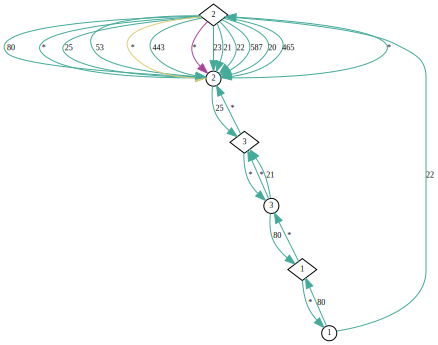

In [10]:
colors = {
    'TCP': '#44aa99',
    'UDP': '#aa4499',
    'OTHER': '#ddcc77' # OTHER actually corresponds to ICMP
}
edges = sorted(
    [(h, k, t)
     for t in dat['counts']
     for h in range(len(dat['top']))
     for k in range(len(dat['bottom']))
    ],
    key=lambda x: -dat['counts'][x[2]][x[0]][x[1]]
)

g = graphviz.Digraph('vast')
THRESHOLD = 40
for h, k, t in edges:
    w = dat['counts'][t][h][k]
    if w >= THRESHOLD:
        u = 'INTERNAL-%d' % h
        v = 'EXTERNAL-%d' % k
        pl, pt, dn = t.split('-')
        pt_lab = pt if pt != 'OTHER' else '*'
        if dn == 'IN':
            g.edge(v, u, label=pt_lab, color=colors[pl], fontsize='8')
        else:
            g.edge(u, v, label=pt_lab, color=colors[pl], fontsize='8')
for h, _ in enumerate(dat['top']):
    g.node('INTERNAL-%d' % h, label=str(h+1), shape='circle', fontsize='8', height='.1', width='.1', margin='.02')
for k, _ in enumerate(dat['bottom']):
    g.node('EXTERNAL-%d' % k, label=str(k+1), shape='diamond', fontsize='8', height='.1', width='.4', margin='.02')

g

As expected, external cluster 1 (Web servers) receives HTTP requests from internal clusters 1 and 3 (workstations), and external cluster 3 (mail and FTP) receives SMTP traffic from internal servers (cluster 2) and FTP traffic from internal workstations (cluster 3). As a side note, the difference between internal clusters 1 and 3 now appears: internal workstations from cluster 3 communicate with the external FTP server. To confirm this hypothesis, let's take a closer look at interactions between internal clusters 1 and 3, and external cluster 3.

In [11]:
full_graph = pd.read_csv('../data/vast.csv')
int_clusters = {}
for h, x in enumerate(dat['top']):
    for u in x:
        int_clusters[u] = h
ext_clusters = {}
for k, x in enumerate(dat['bottom']):
    for c in x:
        ext_clusters[c] = k
full_graph['h'] = full_graph['top'].apply(lambda x: int_clusters[x])
full_graph['k'] = full_graph['bottom'].apply(lambda x: ext_clusters[x])

In [12]:
partial_graph = full_graph[
    (full_graph['k'] == 2)
    &((full_graph['h'] == 2)|(full_graph['h'] == 0))
    &(full_graph['type'] == 'TCP-21-OUT')
]
partial_graph['h'].value_counts()

2    100
Name: h, dtype: int64

Indeed, only workstations from internal cluster 3 initiate FTP connections with external cluster 3, and all 100 of them do:

In [13]:
partial_graph = full_graph[
    (full_graph['k'] == 2)
    &(full_graph['h'] == 2)
    &(full_graph['type'] == 'TCP-21-OUT')
]
print(len(set(partial_graph['top'])))

100


Let's now take another look at the graph and try to understand what external cluster 2 does. There are many interactions with internal cluster 2 (internal servers), but what hosts are actually involved in each of these interactions?

In [14]:
partial_graph = full_graph[
    (full_graph['k'] == 1)
    &(full_graph['h'] == 1)
]
partial_graph.groupby(['type']).agg(lambda x: len(set(x))).loc[:, ('top', 'bottom')]

,top,bottom
type,,
OTHER-OTHER-IN,20,10
TCP-20-IN,19,2
TCP-21-IN,20,2
TCP-22-IN,20,2
TCP-23-IN,20,2
TCP-25-IN,20,56
TCP-443-IN,20,2
TCP-465-IN,20,2
TCP-53-IN,20,2


We see a lot of hosts associated with inbound HTTP traffic, which is somewhat expected. However, other edge types originate from much fewer hosts. In particular, many edge types are associated with only two external hosts &mdash; could these be the same across all edge types?

In [15]:
types = [
    'TCP-20-IN',
    'TCP-21-IN',
    'TCP-22-IN',
    'TCP-23-IN',
    'TCP-443-IN',
    'TCP-465-IN',
    'TCP-53-IN',
    'TCP-587-IN',
    'UDP-OTHER-IN'
]
hosts = set().union(*[
    set(partial_graph[partial_graph['type']==t]['bottom'])
    for t in types
])
hosts

{'10.10.11.15', '10.9.81.5'}

Indeed, the same two hosts are responsible for all this traffic. In fact, these are attackers performing port scans against exposed internal servers. Here's what this looks like:

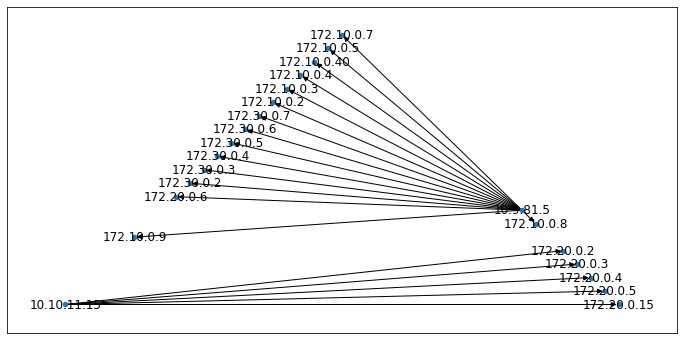

In [16]:
g = nx.DiGraph()
g.add_edges_from([
    (v, u)
    for t in types
    for u, v in zip(
        partial_graph[partial_graph['type'] == t]['top'],
        partial_graph[partial_graph['type'] == t]['bottom']
    )
])
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 6)
pos = nx.planar_layout(g)
nx.draw_networkx(g, pos=pos, with_labels=True, ax=ax, node_size=20)

Moving on with our investigation of external cluster 2, another edge raises our interest: there seems to be some SSH traffic between internal workstations (cluster 1) and this mixed external cluster. Looking closer:

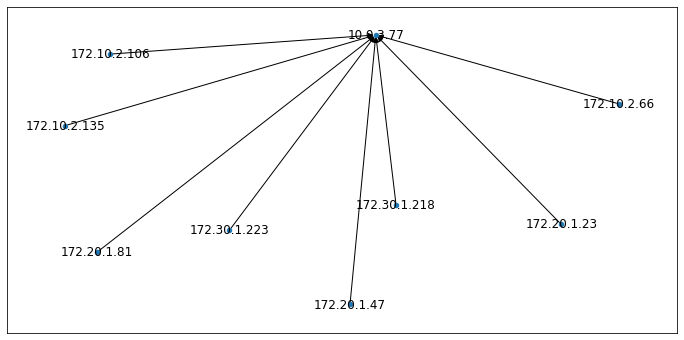

In [17]:
partial_graph = full_graph[
    (full_graph['k'] == 1)
    &(full_graph['h'] == 0)
    &(full_graph['type'] == 'TCP-22-OUT')
]
g = nx.DiGraph()
g.add_edges_from([
    (u, v)
    for u, v in zip(
        partial_graph['top'],
        partial_graph['bottom']
    )
])
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 6)
nx.draw_networkx(g, with_labels=True, ax=ax, node_size=20)

These SSH connections all point towards the same external host (10.0.3.77), which happens to be the command and control server for a botnet. Besides, the eight internal hosts making these connections are identified as infected hosts.